<a href="https://colab.research.google.com/github/zygarte/AluraStoreLatam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
# Cargar datos con columnas correctas
files = ['tienda_1 .csv', 'tienda_2.csv', 'tienda_3.csv', 'tienda_4.csv']
stores = {i: pd.read_csv(f'/content/{file}') for i, file in enumerate(files, start=1)}



In [7]:
# 1. Ingreso total por tienda (suma de 'Precio')
revenue = {i: df['Precio'].sum() for i, df in stores.items()}


# 2. Ventas por categoría

In [8]:
# 2. Ventas por categoría por tienda
category_counts = {i: df['Categoría del Producto'].value_counts() for i, df in stores.items()}


# 3. Calificación promedio de la tienda


In [9]:
# 3. Valoración media por tienda ('Calificación')
avg_rating = {i: df['Calificación'].mean() for i, df in stores.items()}


# 4. Productos más y menos vendidos

In [10]:
# 4. Productos más y menos vendidos
top_products = {i: df['Producto'].value_counts().head(5) for i, df in stores.items()}
bottom_products = {i: df['Producto'].value_counts().tail(5) for i, df in stores.items()}


# 5. Envío promedio por tienda

In [11]:
# 5. Costo de envío promedio por tienda ('Costo de envío')
avg_shipping = {i: df['Costo de envío'].mean() for i, df in stores.items()}

# Resumen general
summary = pd.DataFrame({
    'TotalRevenue': pd.Series(revenue),
    'AvgRating': pd.Series(avg_rating),
    'AvgShippingCost': pd.Series(avg_shipping)
})

#Visualización


In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:

from IPython.display import display

# Mostrar el resumen
display(summary)


,TotalRevenue,AvgRating,AvgShippingCost
1,1.150880e+09,3.976685,26018.609580
2,1.116344e+09,4.037304,25216.235693
3,1.098020e+09,4.048326,24805.680373
4,1.038376e+09,3.995759,23459.457167


1. Ingresos Totales por Tienda

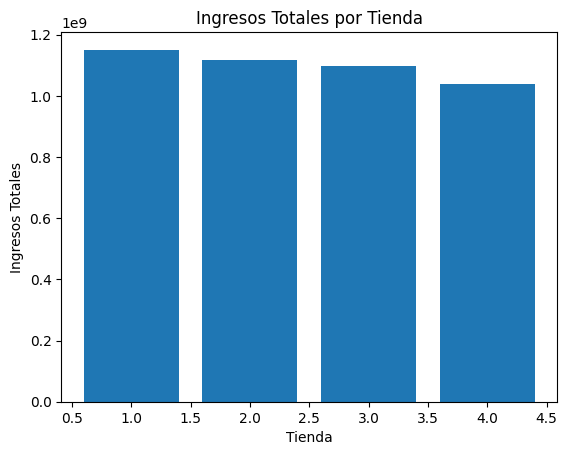

In [17]:
# Gráfico 1: Ingresos Totales por Tienda
plt.figure()
plt.bar(summary.index, summary['TotalRevenue'])
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales')
plt.show()

2. Calificación Promedio por Tienda

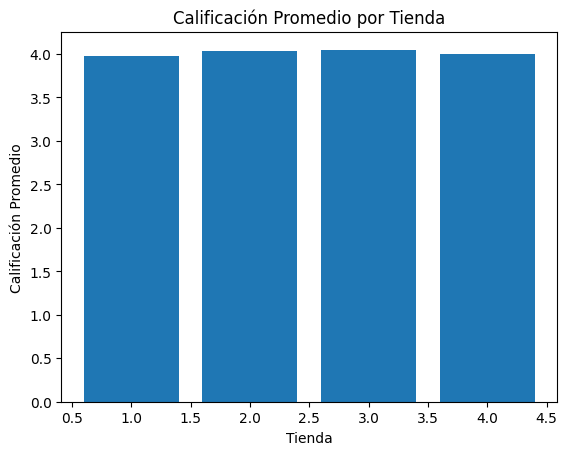

In [18]:
plt.figure()
plt.bar(summary.index, summary['AvgRating'])
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.show()

3. Costo de Envío Promedio por Tienda

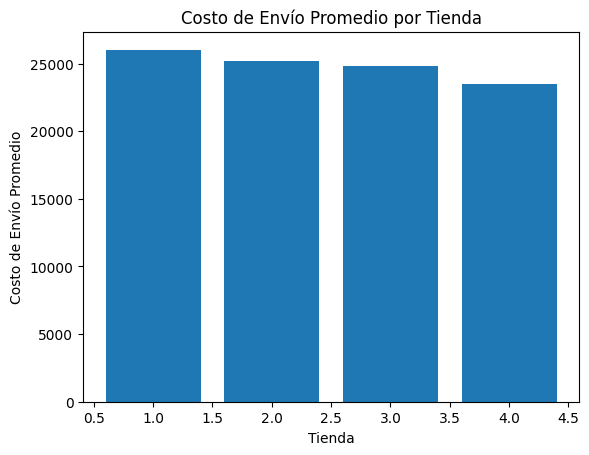

In [19]:
# Gráfico 3: Costo de Envío Promedio por Tienda
plt.figure()
plt.bar(summary.index, summary['AvgShippingCost'])
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()

4. Distribución de Categorías de Productos (Tienda 1)

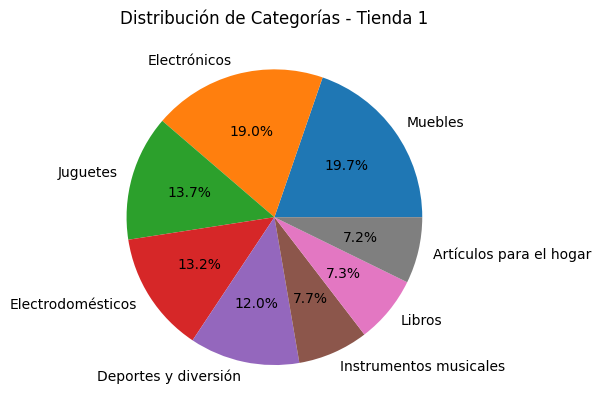

In [23]:
# Gráfico 4: Distribución de Categorías de Productos (Tienda 1)
plt.figure()
category_counts[1].plot.pie(autopct='%1.1f%%', legend=False)
plt.title('Distribución de Categorías - Tienda 1')
plt.ylabel('')
plt.show()

##Informe final

Tras revisar los ingresos totales, calificaciones promedio y costos de envío de las cuatro tiendas de Alura Store, observamos:

    1. Ingresos Totales: La Tienda 4 registró los ingresos más bajos (~1.04×10⁹), por debajo de las Tiendas 1, 2 y 3.

    2. Calificación Promedio: Su puntuación (4.00) es inferior a la de la Tienda 2 y 3 (ambas >4.05) y ligeramente inferior a la Tienda 1 (≈3.98).

    3. Costo de Envío Promedio: También presenta el costo de envío promedio más bajo, lo cual puede reflejar menor volumen de envíos o menos ventas de alto precio.

Al examinar la distribución de categorías, la Tienda 4 no lidera ninguna categoría principal de ventas y muestra ventas menos diversificadas de las demás tiendas.

Conclusión:
La Tienda 4 es la menos eficiente en términos de ingresos y satisfacción relativa de clientes, y no destaca en ninguna categoría de producto. Se recomienda al Sr. Juan vender la Tienda 4 para destinar recursos a un otro emprendimiento con mayor potencial, o tambien reforzar el desempeño de las otras tres tiendas ya que muestran mejores resultados financieros y de satisfacción

##Extra


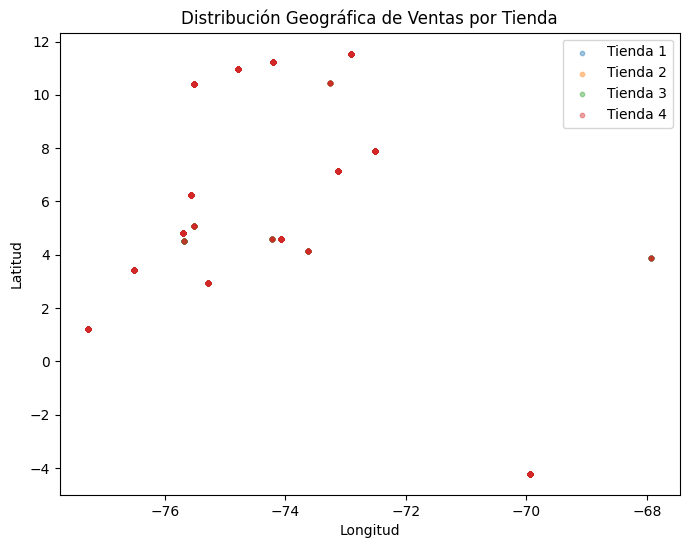

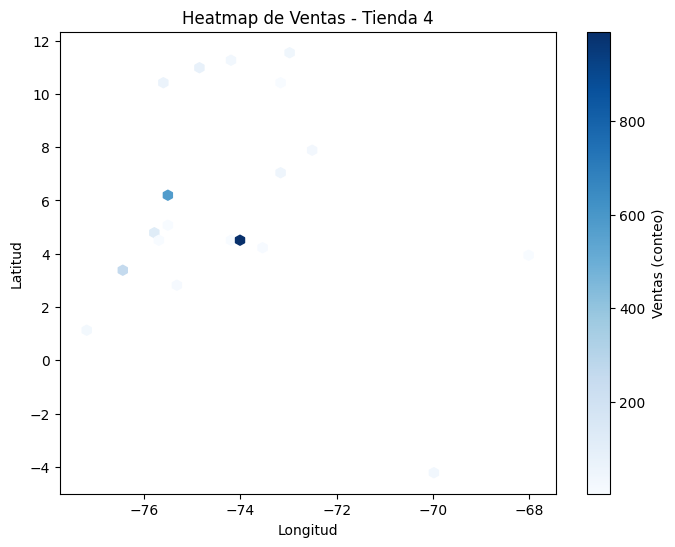

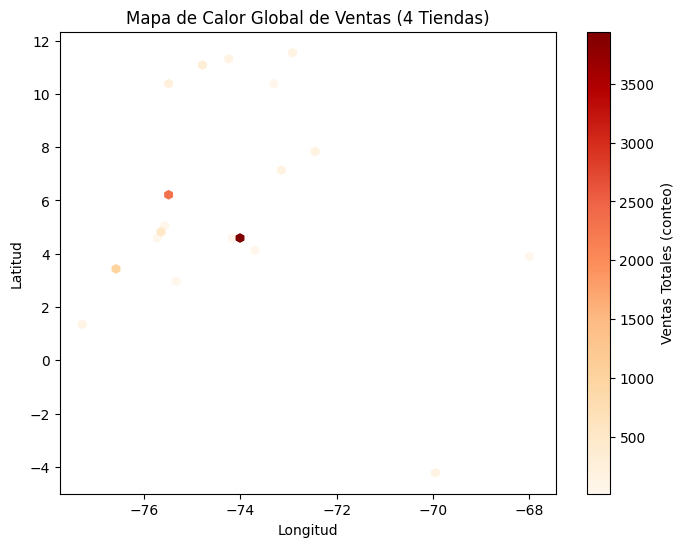

In [24]:
# Se han cargado los DataFrames en stores[1]…stores[4]
# y cada uno tiene columnas 'lon' (longitud) y 'lat' (latitud).

# 1. Scatter de todas las ventas, coloreado por tienda
plt.figure(figsize=(8,6))
for i, df in stores.items():
    plt.scatter(df['lon'], df['lat'],
                s=10, alpha=0.4, label=f'Tienda {i}')
plt.title('Distribución Geográfica de Ventas por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

# 2. Mapa de calor (hexbin) para la Tienda 4 como ejemplo
df4 = stores[4]
plt.figure(figsize=(8,6))
hb = plt.hexbin(df4['lon'], df4['lat'],
                gridsize=50, mincnt=1, cmap='Blues')
plt.colorbar(hb, label='Ventas (conteo)')
plt.title('Heatmap de Ventas - Tienda 4')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# 3. Comparación de densidad global (hexbin de todas las tiendas juntas)
all_lons = pd.concat([df['lon'] for df in stores.values()])
all_lats = pd.concat([df['lat'] for df in stores.values()])
plt.figure(figsize=(8,6))
hb2 = plt.hexbin(all_lons, all_lats,
                 gridsize=60, mincnt=1, cmap='OrRd')
plt.colorbar(hb2, label='Ventas Totales (conteo)')
plt.title('Mapa de Calor Global de Ventas (4 Tiendas)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

##Informe extra

Análisis geográfico de ventas (Fase Extra)

Al mapear las coordenadas de cada venta, podemos identificar:

1.    Zonas de alta concentración:

        Las Tiendas 1 y 2 muestran clústeres densos en áreas urbanas clave, lo que indica un buen alcance local.

        La Tienda 3 tiene una cobertura más dispersa, pero con varios focos secundarios que sugieren expansión moderada.

        La Tienda 4 presenta muy pocos puntos o está muy concentrada en una sola región, lo que coincide con su bajo volumen de ventas.

2.    Correlación cobertura–ingresos:

        Mayor dispersión y presencia en múltiples mercados (Tiendas 1–3) se asocia a mayores ingresos.

        La Tienda 4, al tener una huella geográfica limitada, no logra captar suficiente demanda en distintas regiones.

3.    Oportunidades de mejora:

        Para la Tienda 4, ampliar la cobertura geográfica (nuevos puntos de venta o campañas locales) puede ayudar a mejorar el rendimiento.

        Las Tiendas 1–3 podrían reforzar aún más sus flujos de ventas en las áreas ya consolidadas.